# getting started

welcome to **yabplot**! this library provides a unified interface for plotting brain data across three domains: cortical surfaces, subcortical volumes, and white matter tracts.

in this tutorial, we will cover:
1. checking what atlases are available.
2. basic plotting functions for cortex, subcortex, and tracts.
3. customizing views, layouts, and figure sizes.
4. exporting high-resolution images.

In [ ]:
import yabplot as yab

work_dir = "tutorial_data"
os.makedirs(work_dir, exist_ok=True)

# 1. check availability
# yabplot manages downloads automatically. let's see what is available.
resources = yab.get_available_resources()

print("cortical atlases:", resources.get('cortical'))
print("subcortical atlases:", resources.get('subcortical'))
print("tract atlases:", resources.get('tracts'))

cortical atlases: ['aparc', 'brainnetome', 'schaefer_100', 'schaefer_1000', 'schaefer_200', 'schaefer_300', 'schaefer_400']
subcortical atlases: ['aseg', 'brainnetome_sc', 'jhu', 'musus100', 'musus100_dbn', 'musus100_tha']
tract atlases: ['hcp1065_medium', 'hcp1065_small', 'hcp1065_tiny', 'xtract_large', 'xtract_medium', 'xtract_small', 'xtract_tiny']


## 1. plotting the cortex
the `plot_cortical` function renders data on the conte69 surface. if no data is provided, it shows the atlas regions colored categorically.

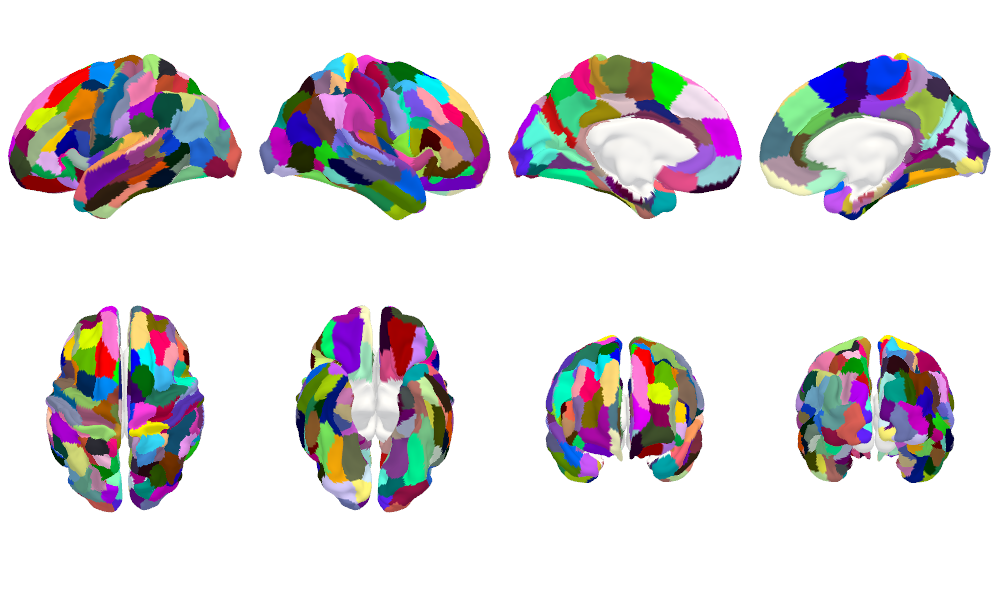

In [31]:
# basic plot with default settings
# note: we use display_type='static' for documentation purposes. 
# change to 'interactive' to open a rotatable window.
yab.plot_cortical(atlas='brainnetome', display_type='static')

Plotting Custom Volume-to-Surface Map...


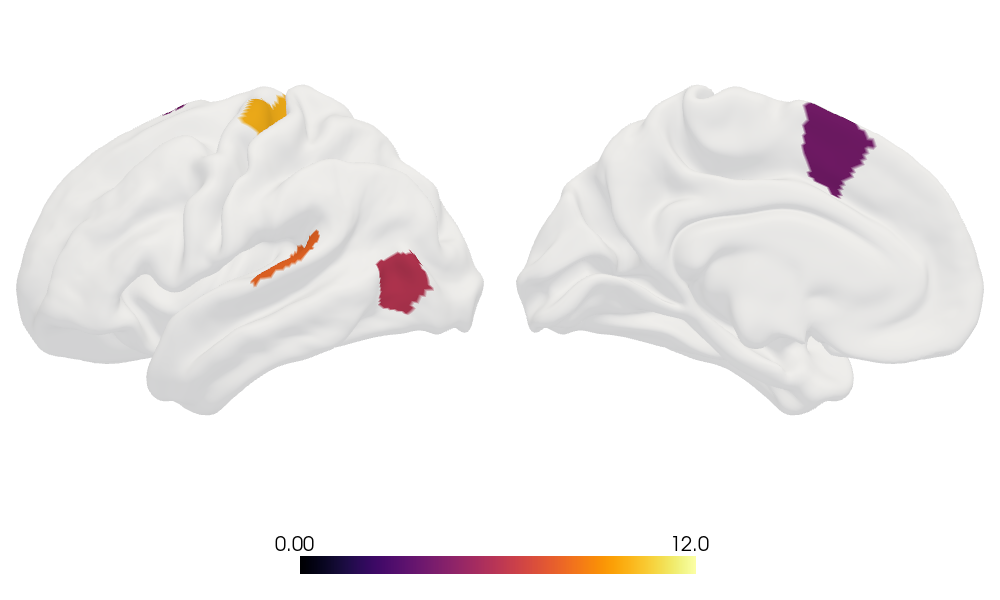

In [32]:
test_data = {
    # 1. Primary Motor Cortex (Upper Limb) -> Should be on the Precentral Gyrus (lateral)
    'A4ul_L': 10, 
    
    # 2. Auditory Cortex -> Should be on the Superior Temporal Gyrus (near the ear)
    'A41/42_L': 8,
    
    # 3. Visual Motion Area (MT+) -> Should be at the junction of Occipital/Temporal lobes
    'V5/MT+_L': 6,
    
    # 4. Medial Prefrontal -> Should be on the flat midline surface (between hemispheres)
    'A8m_L': 4
}

print("Plotting Custom Volume-to-Surface Map...")
yab.plot_cortical(
    data=test_data,
    atlas='brainnetome',
    views=['left_lateral', 'left_medial'],
    cmap='inferno',
    vminmax=[0, 12],
    style='matte'
)

## 2. views and layouts
you can easily change the camera angles or the grid layout. `views` accepts a list of presets like `'left_lateral'`, `'superior'`, `'anterior'`, etc.

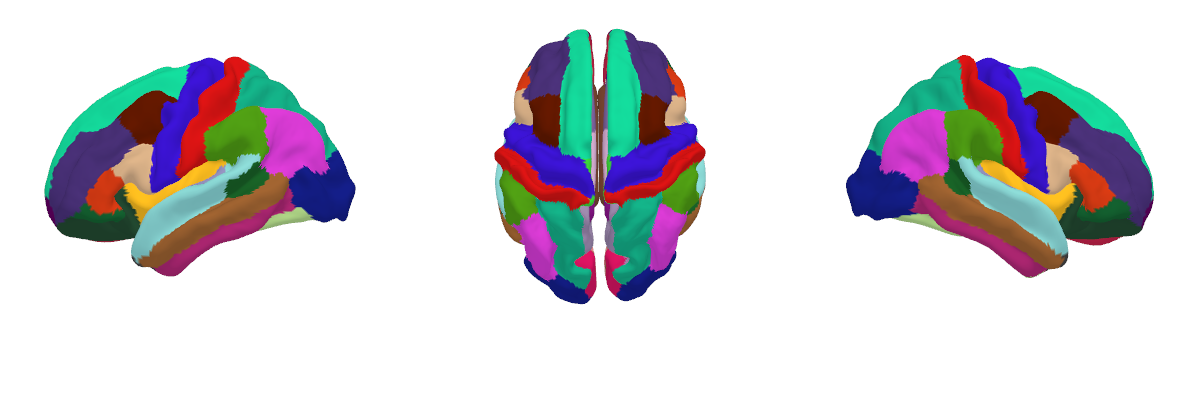

In [33]:
# showing multiple views with a custom layout
# layout=(rows, cols). here we want 1 row, 3 columns.
yab.plot_cortical(
    atlas='aparc',
    views=['left_lateral', 'superior', 'right_lateral'],
    layout=(1, 3),
    figsize=(1200, 400),
    display_type='static'
)

## 3. subcortical structures
`plot_subcortical` renders 3d meshes for volumetric structures.

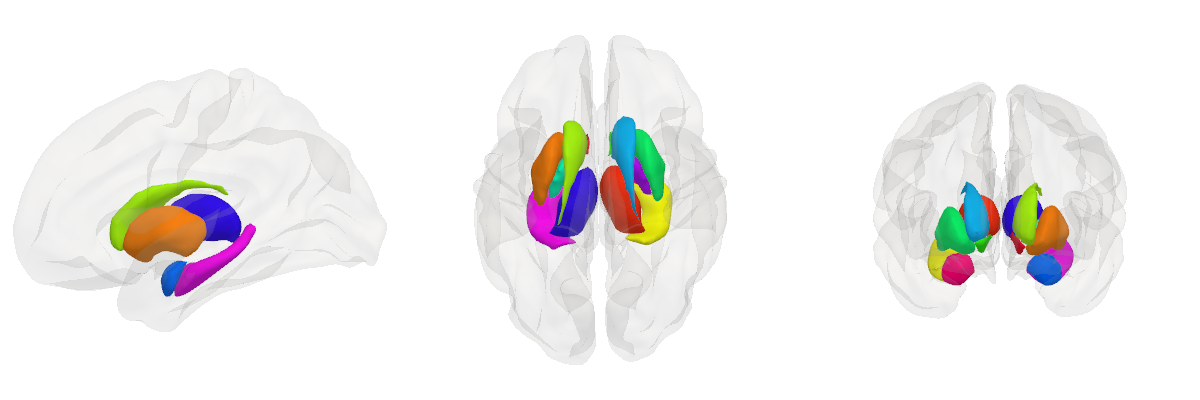

In [34]:
# plot the 'aseg' atlas with a sculpted lighting style
yab.plot_subcortical(
    atlas='aseg',
    views=['left_lateral', 'superior', 'anterior'],
    layout=(1, 3),
    figsize=(1200, 400),
    style='sculpted',
    display_type='static'
)

## 4. white matter tracts
`plot_tracts` renders streamlines. you can also color them by orientation (standard dti colors: red=l/r, green=a/p, blue=s/i).

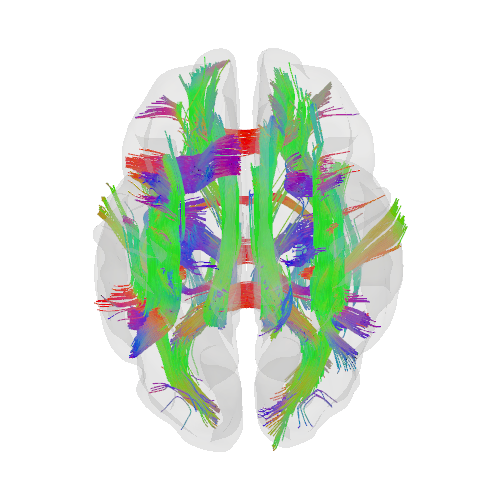

In [35]:
# coloring tracts by orientation
yab.plot_tracts(
    atlas='xtract_tiny',
    orientation_coloring=True,
    views=['superior'],
    style='matte',
    figsize=(500, 500),
    display_type='static'
)

## 5. interactivity and animation
use the `display_type` argument to choose the way the figure is displayed. moreover, you can modify the pyvista plotter object after running the yabplot functions as in below where we create an animated image with rotating brain.

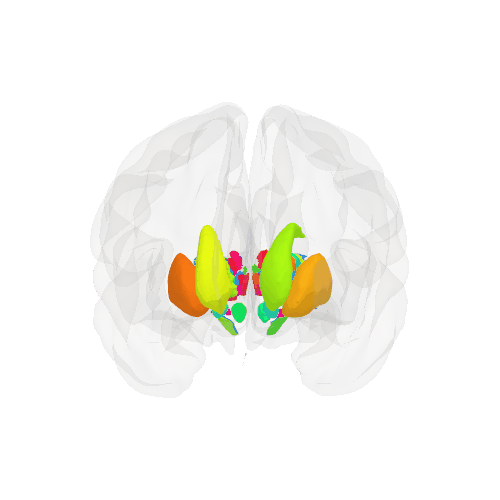

In [36]:
p = yab.plot_subcortical(
    atlas='musus100', 
    views=['anterior'],
    figsize=(500, 500),
    display_type=None # set to 'interactive' for interactivity, 
    # currently we leave it to None to make changes afterwards
)

# open a gif file
p.open_gif(os.path.join(work_dir, "brain_rotation.gif"))

# rotate the camera 360 degrees by 5 frames
for angle in range(0, 360, 5):
    p.camera.azimuth += 5
    p.write_frame()
p.close()

from IPython.display import display, Image
display(Image(filename=os.path.join(work_dir, "brain_rotation.gif")))

## 6. saving figures
use the `export_path` argument to save your plot to a file (png, jpg, pdf).

In [37]:
# save a figure without showing it inline (display_type='none')
yab.plot_cortical(
    atlas='schaefer_100',
    export_path=os.path.join(work_dir, "my_figure.png"),
    display_type='none' 
)

print(f"saved figure to: {os.path.join(work_dir, 'my_figure.png')}")

saved figure to: tutorial_data/my_figure.png
